# Fractional Ages

Given values of $l_x$ at integer ages only, we need to make some assumption about the probability distribution for the future lifetime random variable between integer ages, in order to calculate survival function values for non-integer ages or durations. Such fractional age assumptions may be specified in terms of the force of mortality function (e.g. constant) or the survival or mortality probabilities (e.g. uniform distribution of deaths).



## Uniform distribution of deaths

This is the simplest assumption, which linearly interpolates the number of lives between integer ages.

$T_x = K_x + R_x$
- The UDD assumptions define can be modeled by a new random variable $R_x \sim U(0,1)$ which is independent of curtate lifetime $K_x$.

$_rq_x = r ~ q_x$, for integer $x$ and $0 \le r < 1$
- is an equivalent way of formulating the UDD assumption

$l_{x+r} = (1 - r) ~ l_x + r ~ l_{x+1} = l_x - r~d_x$ 

- linear interpolation of lives between integer ages

$_rq_{x+s} = \dfrac{r ~ q_x}{1 - s ~ q_x}, \quad$ for $0 \le s + r < 0$

- mortality rate at a fractional age over a fractional duration, under UDD

$\mu_{x+r} = \dfrac{1}{1 - r ~ q_x}$
- applying the UDD approximation over successive ages implies a discontinuous function for the force of mortality, with discontinuities occurring at integer ages.

$f_x(r) =~ _rp_x \mu_{x+r} =~ q_x$

- lifetime density is constant between integer ages, which also follows from the UDD assumption for $R_x$.

$\overset{\circ}{e}_{x:\overline{1|}} = 1 - q_x \dfrac{1}{2} = q_x \dfrac{1}{2} + ~p_x$

- 1-year limited complete expectation 

$\overset{\circ}{e}_{x:\overline{r|}} =~ _rq_x \dfrac{r}{2} +~ _rp_x r$

- fractional year limited complete expectation 

$\overset{\circ}{e}_{x} = q_x \dfrac{1}{2} + p_x(1 + \overset{\circ}{e}_{x+1}) = \overset{\circ}{e}_{x:\overline{1|}} + p_x \overset{\circ}{e}_{x+1}$ 

- recursive for complete expectation of life: UDD-specific and general formulas




$\overset{\circ}{e}_{x} = e_x + 0.5$ 

- since $E[R_x] = 0.5$

$Var(T_x) = Var(K_x) + \dfrac{1}{12}$ 

- since $Var[R_x] = \dfrac{1}{12}$

$\overset{\circ}{e}_{x:\overline{n|}} = e_{x:\overline{n|}} + 0.5 ~_nq_x$ 

- These exact results under UDD are often used generally as approximations between complete and curtate expectations.



## Constant force of mortality

Under this assumption, the force of mortality is set to be constant between integer ages

$\mu_{x+r} =~ \mu_{x} =~ -\ln ~p_x, \quad$ for $0 \le r < 1$
- which leads to a step function for the force of mortality over successive years of age

$l_{x+r} = (l_x)^{1-r} \cdot (l_{x+1})^{r}$

- constant force of mortality is equivalent to exponential interpolation of lives between integer ages

$_rp_x = e^{-\mu_x r} = (p_x)^r$

- since $p_x = e^{-\int_0^1 \mu_{x+u} du} = e^{-\mu_x}$

$_rp_{x+s} = e^{-\int_0^r \mu_{x+s+u} du} = (p_x)^r, \quad$ for $0 \le r+s < 1$

- the probability of surviving for period of $r$ from age $x+s$ is independent of $s$ under constant force of mortality

$f_x(r) =~ _rp_x ~ \mu_{x+r} = e^{-\mu_x r} \cdot \mu_x,\quad$ for $0 \le r <1$

- lifetime density function at fractional age using constant force of mortality assumption

$\overset{\circ}{e}_{x:\overline{r|}} = \dfrac{1 - e^{-\mu_x r}}{\mu}$

- fractional year limited complete expectation 

## Methods


The `Fractional` class implements methods to compute survival and mortality functions between integer ages, assuming either uniform distribution of deaths or constant force of mortality

In [1]:
from actuarialmath import Fractional
import describe
describe.methods(Fractional)


class Fractional - Compute survival functions at fractional ages and durations

    Args:
      udd : select UDD (True, default) or CFM (False) between integer ages

    Methods:
    --------

    l_r(x, s, r):
      Number of lives at fractional age: l_[x]+s+r

    p_r(x, s, r, t):
      Probability of survival from and through fractional age: t_p_[x]+s+r

    q_r(x, s, r, t, u):
      Deferred mortality rate within fractional ages: u|t_q_[x]+s+r

    mu_r(x, s, r):
      Force of mortality at fractional age: mu_[x]+s+r

    f_r(x, s, r, t):
      mortality function at fractional age: f_[x]+s+r (t)

    E_r(x, s, r, t):
      Pure endowment at fractional age: t_E_[x]+s+r

    e_r(x, s, t):
      Temporary expected future lifetime at fractional age: e_[x]+s:t

    e_approximate(e_complete, e_curtate, variance):
      Convert between curtate and complete expectations assuming UDD shortcut




## Examples


The `Fractional` class can be initialized to apply the uniform distribution or constant force of mortality assumptions at fractional ages (by setting the `udd` argument to be either True or False respectively), while using any other survival model for integer ages. Then survival function values at fractional ages can be computed by the methods `l_r`, `p_r`, `q_r`, `mu_r`, `f_r` and `E_r` (for the number of lives, survival probability, mortality rate, force of mortality, lifetime density and pure endowment functions respectively).


In [2]:
cfm = Fractional(udd=False).set_survival(l=lambda x,t: 50-x-t)
udd = Fractional(udd=True).set_survival(l=lambda x,t: 50-x-t)
print('Compare:   Constant Force of Mortality    vs    UDD  assumptions')
print('           ---------------------------         -----')
print('mortality rate    ', cfm.q_r(40, t=0.5), udd.q_r(40, t=0.5))
print('force of mortality', cfm.mu_r(40, r=0.5), udd.mu_r(40, r=0.5))
print('lifetime density  ', cfm.f_r(40, r=0.5), udd.f_r(40, r=0.5))

Compare:   Constant Force of Mortality    vs    UDD  assumptions
           ---------------------------         -----
mortality rate     0.05131670194948623 0.04999999999999999
force of mortality 0.10536051565782628 0.10526315789473682
lifetime density   0.10536051565782628 0.09999999999999998


When using constant force of maturity as the fractional age assumption, the force of maturity may show discontinuous jumps at integer ages

Text(0.5, 1.0, 'Fractional Age Assumptions and Force of Mortality')

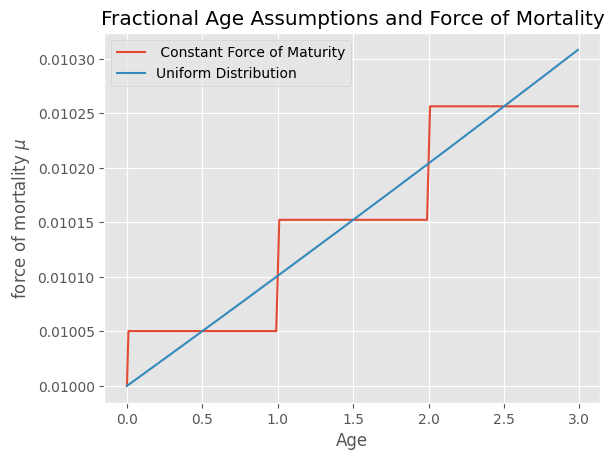

In [24]:
import numpy as np
import matplotlib.pyplot as plt
cfm = Fractional(udd=False).set_survival(l=lambda x,s: 100 - (x+s))
udd = Fractional(udd=True).set_survival(l=lambda x,s: 100 - (x+s))
x = np.arange(0, 3, 0.01)
plt.plot(x, [cfm.mu_r(x=0, r=r) for r in x])
plt.plot(x, [udd.mu_r(x=0, r=r) for r in x])
plt.legend([' Constant Force of Maturity', 'Uniform Distribution'])
plt.ylabel('force of mortality $\mu$')
plt.xlabel('Age')
plt.title('Fractional Age Assumptions and Force of Mortality')

The uniform distribution assumption for fractional ages linearly interpolates the number of lives between integer ages, whereas the constant force of mortality asssumption uses exponential interpolation.

Text(0.5, 1.0, 'Fractional Age Assumptions and Interpolation of Lives')

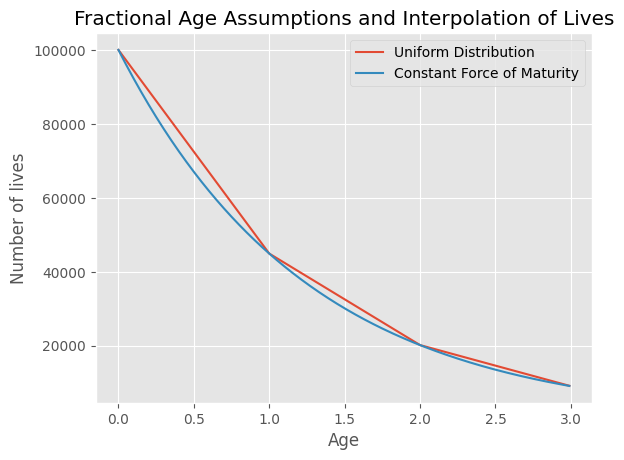

In [28]:
udd = Fractional(udd=True).set_survival(mu=lambda x,s: 0.8)
cfm = Fractional(udd=False).set_survival(mu=lambda x,s: 0.8)
plt.plot(x, [udd.l_r(x=0, r=r) for r in x])
plt.plot(x, [cfm.l_r(x=0, r=r) for r in x])
plt.legend(['Uniform Distribution', 'Constant Force of Maturity'])
plt.ylabel('Number of lives')
plt.xlabel('Age')
plt.title('Fractional Age Assumptions and Interpolation of Lives')

The complete future lifetime for fractional limited durations starting from integer ages is computed by the `e_r` class method. Under the hood, when the duration is one year or less, then shortcuts are available for both the uniform distribution and constant force of maturity cases; when the limited duration is more than one year, then the general one-year recursion formula is repeatedly applied until the last period of length less than or equal to one year is reached.

In [6]:
import numpy as np
x = [0.5, 1., 1.5, 2.]
udd = Fractional(udd=False).set_survival(l=lambda x,s: 50 - (x+s), maxage=50)
cfm = Fractional(udd=True).set_survival(mu=lambda x,s: 0.03)
print('UDD: ', [round(udd.e_r(x=0, t=t), 4) for t in x])
print('CFM: ', [round(cfm.e_r(x=0, t=t), 4) for t in x])


UDD:  [0.4975, 0.99, 1.4774, 1.9599]
CFM:  [0.4963, 0.9852, 1.4669, 1.9413]


The exact results under the assumption of uniform distribution of deaths are often used to approximate between curtate and complete expectations, and can be computed by the `e_approximate` static method

In [7]:
print(Fractional.e_approximate(e_complete=15), 
      Fractional.e_approximate(e_complete=200, variance=True))
print(Fractional.e_approximate(e_curtate=15), 
      Fractional.e_approximate(e_curtate=200, variance=True))

14.5 199.91666666666666
15.5 200.08333333333334
